In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def load_file(file_name):
    f = open(file_name, 'r')
    array_r = []
    array_t = []
    array_p = []
    array_pps = []
    for r in f:
        
        line = r.strip().split(' ')
        #print(line)
        if line[6].strip() == "RESERVATION_CONFIRMED,":
            pass
            #array_r.append([float(line[0].strip()), int(line[1].strip()), int(line[3].strip()), int(line[4].strip())])
        elif line[6].strip() == "VEHICLE_REMOVED,":
            pass
            #array_t.append([float(line[0].strip()), int(line[1].strip()), float(line[3].strip())])
        elif line[6].strip() == "V2I_MSG_PROCESSED_PER_STEP,":
            array_pps.append(float(line[7]))
        elif line[6].strip() == "V2I_MSG_PROCESSED,":
            array_p.append(float(line[7][0:-1]))
    #df_r = pd.DataFrame(array_r, columns=["time", "vid", "conflicts", "unacceptables"])
    #df_t = pd.DataFrame(array_t, columns=["time", "vid", "duration"])
    return array_p, array_pps
    #return (df_r, df_t)

In [3]:
l2p, l2pps = load_file("/Users/koh1/dev/aim4-root/logs/mylog_v1000_2l.log")
l3p, l3pps = load_file("/Users/koh1/dev/aim4-root/logs/mylog_v1000_3l.log")
l5p, l5pps = load_file("/Users/koh1/dev/aim4-root/logs/mylog_v1000_5l.log")


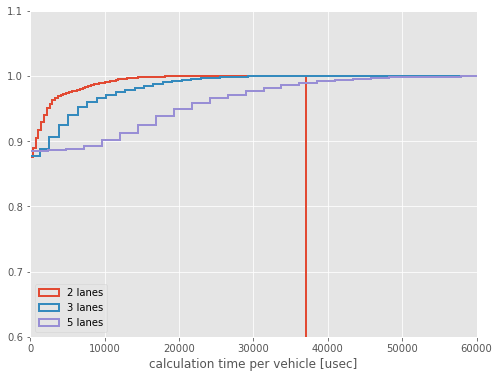

In [4]:
plt.figure(figsize=(8,6))
plt.hist(l2pps, bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="2 lanes", linewidth=2)
plt.hist(l3pps, bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="3 lanes", linewidth=2)
plt.hist(l5pps, bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="5 lanes", linewidth=2)
plt.xlim(0,60000)
plt.ylim(0.6, 1.1)
plt.xlabel("calculation time per vehicle [usec]")
plt.legend(loc='lower left')

# Request/Response Time

In [13]:
def load_sim_result(file_name):
    f = open(file_name, 'r')
    # request-response (simulated computation and nw latency)
    # travel time
    # real calculation time for the vehicle
    result_list = {}
    result = []
    plan_per_cycle = []
    for r in f:

        line = r.strip().split(' ')
        if line[6].strip() == "ARRIVAL_ESTIMATE_TIME":
            devid = line[8].strip()
            if devid in result_list:
                result_list[devid]["estimate_time_us"] = float(line[7].strip())
            else:
                result_list[devid] = {"estimate_time_us": float(line[7].strip())}
        elif line[6].strip() == "AWAITING_RESPONSE":
            devid = line[8].strip()
            if devid in result_list:
                if not "awaiting_time_s" in result_list[devid]:
                    result_list[devid]["awaiting_time_s"] = float(line[7].strip())
            else:
                result_list[devid] = {"awaiting_time_s": float(line[7].strip())}
        elif line[6].strip() == "V2I_MSG_PROCESSED":
            devid = line[8].strip()
            if devid in result_list:
                result_list[devid]["planning_time_us"] = float(line[7].strip())
            else:
                result_list[devid] = {"planning_time_us": float(line[7].strip())}
        elif line[6].strip() == "RESERVATION_CONFIRMED":
            devid = line[8].strip()
            if devid in result_list:
                result_list[devid]["reserved_time_s"] = float(line[7].strip())
                result_list[devid]["response_time_s"] = result_list[devid]["reserved_time_s"] - result_list[devid]["awaiting_time_s"]
                result_list[devid]["reject_count"] = int(line[9].strip())
                result_list[devid]["unacceptable_count"] = int(line[10].strip())
                result_list[devid]["nw_latency_s"] = float(line[11].strip())                
            else:
                pass
#                result_list[devid] = {"reserved_time": float(line[7].strip())}
            #array_r.append([float(line[0].strip()), int(line[1].strip()), int(line[3].strip()), int(line[4].strip())])
        elif line[6].strip() == "VEHICLE_REMOVED":
            devid = line[8].strip()
            if devid in result_list:
                result_list[devid]["removed_time_s"] = float(line[7].strip())
                result_list[devid]["travel_time_s"] = float(line[9].strip())
            #array_t.append([float(line[0].strip()), int(line[1].strip()), float(line[3].strip())])
        else:
            pass
        #elif line[6].strip() == "V2I_MSG_PROCESSED_PER_STEP,":
    #df_r = pd.DataFrame(array_r, columns=["time", "vid", "conflicts", "unacceptables"])
    #df_t = pd.DataFrame(array_t, columns=["time", "vid", "duration"])
    for k,v in result_list.items():
        nv = v
        nv["devid"] = k
        result.append(nv)
    return pd.DataFrame(result)
    #return (df_r, df_t)

In [14]:
lane1 = load_sim_result("/Users/koh1/dev/aim4-root/logs/mylog_v1000_1l_201802190035.log")
df1 = lane1.dropna(axis=0, how='any')
lane2 = load_sim_result("/Users/koh1/dev/aim4-root/logs/mylog_v1000_2l_201802190035.log")
df2 = lane2.dropna(axis=0, how='any')
lane3 = load_sim_result("/Users/koh1/dev/aim4-root/logs/mylog_v1000_3l_201802190035.log")
df3 = lane3.dropna(axis=0, how='any')
lane4 = load_sim_result("/Users/koh1/dev/aim4-root/logs/mylog_v1000_4l_201802190035.log")
df4 = lane4.dropna(axis=0, how='any')
lane5 = load_sim_result("/Users/koh1/dev/aim4-root/logs/mylog_v1000_5l_201802190035.log")
df5 = lane5.dropna(axis=0, how='any')

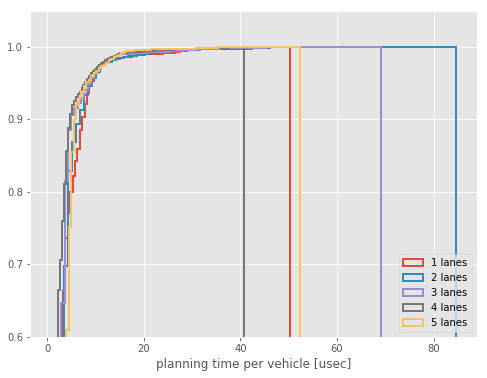

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df1["planning_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="1 lanes", linewidth=2)
plt.hist(df2["planning_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="2 lanes", linewidth=2)
plt.hist(df3["planning_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="3 lanes", linewidth=2)
plt.hist(df4["planning_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="4 lanes", linewidth=2)
plt.hist(df5["planning_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="5 lanes", linewidth=2)
#plt.xlim(0,40)
plt.ylim(0.6, 1.05)
plt.xlabel("planning time per vehicle [usec]")
plt.legend(loc='lower right')

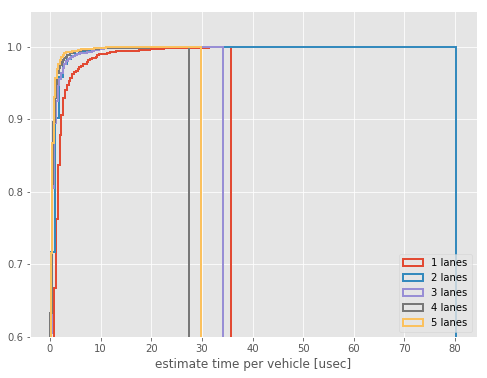

In [118]:
plt.figure(figsize=(8,6))
plt.hist(df1["estimate_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="1 lanes", linewidth=2)
plt.hist(df2["estimate_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="2 lanes", linewidth=2)
plt.hist(df3["estimate_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="3 lanes", linewidth=2)
plt.hist(df4["estimate_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="4 lanes", linewidth=2)
plt.hist(df5["estimate_time_us"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="5 lanes", linewidth=2)
#plt.xlim(0,40)
plt.ylim(0.6, 1.05)
plt.xlabel("estimate time per vehicle [usec]")
plt.legend(loc='lower right')

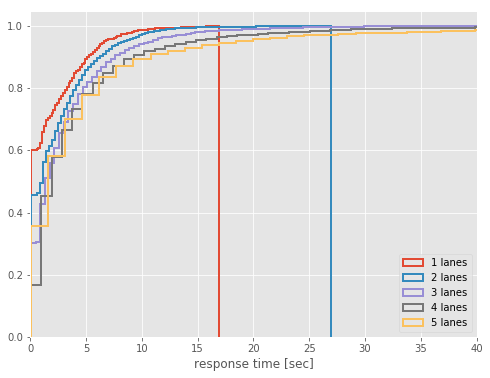

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df1["response_time_s"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="1 lanes", linewidth=2)
plt.hist(df2["response_time_s"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="2 lanes", linewidth=2)
plt.hist(df3["response_time_s"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="3 lanes", linewidth=2)
plt.hist(df4["response_time_s"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="4 lanes", linewidth=2)
plt.hist(df5["response_time_s"], bins=100, histtype='step', cumulative=True, normed=True, alpha=1, fill=False, label="5 lanes", linewidth=2)
plt.xlim(0,40)
#plt.ylim(0.6, 1.05)
plt.xlabel("response time [sec]")
plt.legend(loc='lower right')

In [23]:
df5.describe()

,awaiting_time_s,estimate_time_us,nw_latency_s,planning_time_us,reject_count,removed_time_s,reserved_time_s,response_time_s,travel_time_s,unacceptable_count
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000
mean,801.487969,0.458628,0.041953,4.564994,28.305254,822.015959,806.766768,5.278799,97.898424,0.127815
std,461.686892,0.881040,0.017417,2.818630,49.764432,461.627864,461.797503,8.999049,60.787036,1.122585
min,1.040000,0.116000,0.020000,0.845000,0.000000,22.340000,1.120000,0.060000,20.760000,0.000000
25%,398.585000,0.193000,0.026790,3.535000,7.000000,421.925000,406.720000,1.320000,45.715000,0.000000
50%,798.010000,0.241000,0.040330,4.140000,13.000000,819.360000,803.960000,2.480000,92.130000,0.000000
75%,1206.130000,0.480250,0.053908,4.949250,29.000000,1228.750000,1214.020000,5.460000,135.355000,0.000000
max,1589.720000,29.805000,0.100000,52.332000,871.000000,1606.560000,1592.500000,153.200000,365.640000,53.000000


In [10]:
0.04 * 170

6.8